In [49]:
import numpy as np
import matplotlib.pyplot as plt
from radporo import simulate
from matplotlib.gridspec import GridSpec


In [72]:
# Define the parameters
params = {
    'K': 9e9,       # Bulk modulus (Pa)
    'G': 3e9,       # Shear modulus (Pa)
    'rho': 1000,    # Fluid density (kg/m^3)
    'g': 9.81,
    'alpha': 0.8,   # Biot's coefficient
    'S': 1e-10,     # Storage coefficient (1/Pa)
    'k': 1e-15,     # Permeability (m^2)
    'a': 0.100,     # Inner radius (m)
    'b': 0.150,     # Outer radius (m)
    'N_r': 100,     # Number of spatial grid points
    'N_t': 150,     # Number of time steps
    'T': 1000.0     # Total simulation time (s)
}

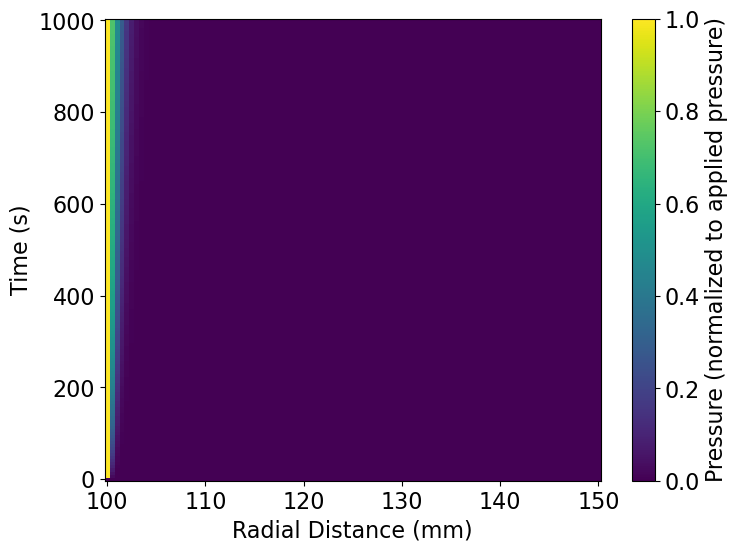

In [73]:
# Run the simulation
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the results
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(R*1e3, t, p_all, shading='auto')
plt.xlabel('Radial Distance (mm)')
plt.ylabel('Time (s)')
plt.colorbar(c, label='Pressure (normalized to applied pressure)')
plt.show()

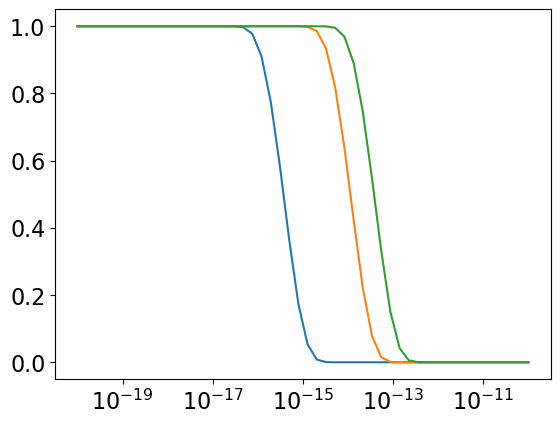

In [74]:
plt.subplots()

for thickness in np.linspace(0.001,0.010,3):
    params['a'] = params['b'] - thickness
    dp = []
    k_list = np.logspace(-20, -10, 50)
    for k in k_list:
        params['k'] = k
        u_all, epsilon_all, p_all, t, R = simulate(params)
        dp.append(p_all[-1,0] - p_all[-1,-1])
    dp = np.array(dp)

    plt.semilogx(k_list,dp)
plt.show()

In [78]:
# Plotting the pressure difference vs. permeability for varying thicknesses
# thickness_list = (0.001, 0.01, 0.1)  # Thickness values in meters
# for thickness in thickness_list:
    # params['a'] = params['b'] - thickness
dp = []
k_list = np.logspace(-17, -10, 100)
for k in k_list:
    params['k'] = k
    u_all, epsilon_all, p_all, t, R = simulate(params)
    dp.append(p_all[-1, 0] - p_all[-1, -1])  # Pressure difference
dp = np.array(dp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


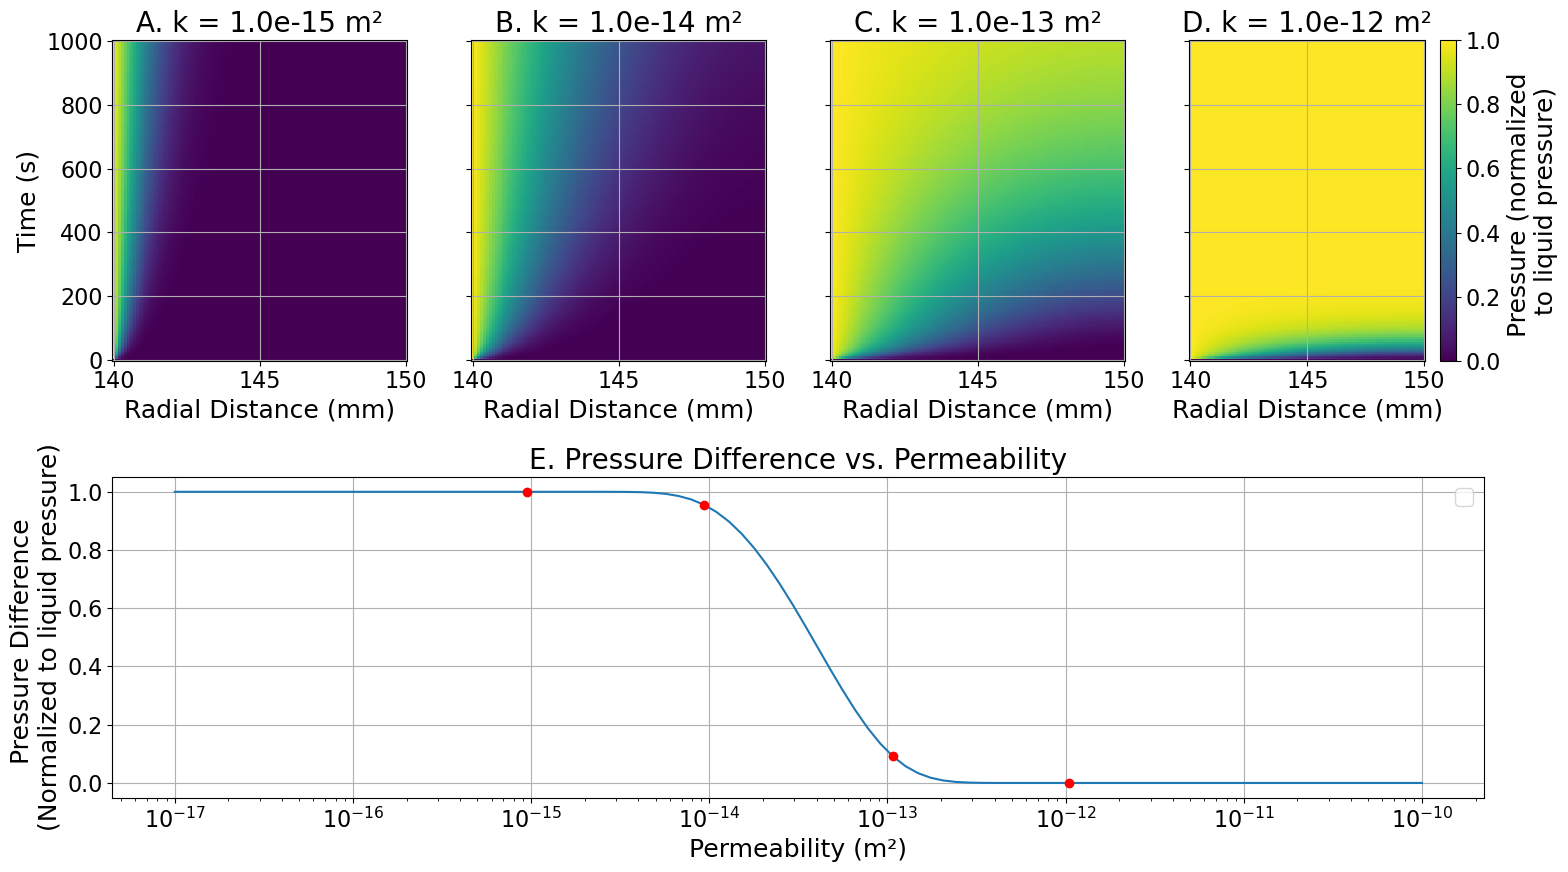

In [79]:
# permeability values to plot in the top row
k_examples = (1e-15,1e-14,1e-13,1e-12)

# Set global font size
plt.rcParams.update({'font.size': 16})

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(16, 9))
gs = GridSpec(2, 4, height_ratios=[1, 1])

# First row, left subplot
ax1 = fig.add_subplot(gs[0, 0])

# Run the simulation for the first permeability value
params['k'] = k_examples[0] # Permeability for the first plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c1 = ax1.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax1.set_xlabel('Radial Distance (mm)', fontsize=18)
ax1.set_ylabel('Time (s)', fontsize=18)
ax1.set_title(f'A. k = {params["k"]:.1e} m²', fontsize=20)
# cbar1 = fig.colorbar(c1, ax=ax1)
# cbar1.set_label('Pressure (normalized to applied pressure)', fontsize=18)
ax1.grid(True)

# First row, second subplot
ax2 = fig.add_subplot(gs[0, 1])

# Run the simulation for the second permeability value
params['k'] = k_examples[1]  # Permeability for the second plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c2 = ax2.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax2.set_xlabel('Radial Distance (mm)', fontsize=18)
ax2.set_title(f'B. k = {params["k"]:.1e} m²', fontsize=20)
ax2.set_yticklabels([])
ax2.grid(True)

# First row, second subplot
ax3 = fig.add_subplot(gs[0, 2])

# Run the simulation for the first permeability value
params['k'] = k_examples[2]  # Permeability for the first plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c3 = ax3.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax3.set_xlabel('Radial Distance (mm)', fontsize=18)
ax3.set_title(f'C. k = {params["k"]:.1e} m²', fontsize=20)
ax3.set_yticklabels([])
ax3.grid(True)

# First row, second subplot
ax4 = fig.add_subplot(gs[0, 3])

# Run the simulation for the first permeability value
params['k'] = k_examples[3]  # Permeability for the first plot
u_all, epsilon_all, p_all, t, R = simulate(params)

# Plotting the pressure distribution
c4 = ax4.pcolormesh(R * 1e3, t, p_all, shading='auto')
ax4.set_xlabel('Radial Distance (mm)', fontsize=18)
ax4.set_title(f'D. k = {params["k"]:.1e} m²', fontsize=20)
ax4.set_yticklabels([])
ax4.grid(True)
cbar4 = fig.colorbar(c4, ax=ax4)
cbar4.set_label('Pressure (normalized \nto liquid pressure)', fontsize=18)


# Second row, big subplot that spans both columns
ax5 = fig.add_subplot(gs[1, :])  # This spans both columns
# ax3.semilogx(k_list, dp, label=f'Thickness = {thickness * 1e3:.1f} mm')
ax5.semilogx(k_list, dp)
for thisk in (1e-15,1e-14,1e-13,1e-12):
    ind = np.argmin(np.abs(k_list-thisk))
    ax5.plot(k_list[ind],dp[ind],'or')

ax5.set_xlabel('Permeability (m²)', fontsize=18)
ax5.set_ylabel('Pressure Difference \n(Normalized to liquid pressure)', fontsize=18)
ax5.set_title('E. Pressure Difference vs. Permeability', fontsize=20)
ax5.grid(True)
ax5.legend(fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('radporo.png')
plt.show()